In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [70]:
%store -r data_scaled



In [73]:
%store -r data_ros

In [72]:
data_scaled=data_scaled.sample(frac=0.2, replace=False, random_state=150)
X = data_scaled.drop(['target'],axis=1)
y = data_scaled.target

In [67]:
train, test, train_labels, test_labels = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626745 entries, 3312770 to 4278499
Data columns (total 75 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   consommation_level_1     626745 non-null  float64
 1   consommation_level_2     626745 non-null  float64
 2   consommation_level_3     626745 non-null  float64
 3   consommation_level_4     626745 non-null  float64
 4   old_index                626745 non-null  float64
 5   new_index                626745 non-null  float64
 6   months_number            626745 non-null  float64
 7   district__62             626745 non-null  uint8  
 8   district__63             626745 non-null  uint8  
 9   district__69             626745 non-null  uint8  
 10  client_catg__12          626745 non-null  uint8  
 11  client_catg__51          626745 non-null  uint8  
 12  region__103              626745 non-null  uint8  
 13  region__104              626745 non-null  uint8  
 1

Recall:  0.07879071947504102
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    247270
         1.0       0.39      0.08      0.13     21335

    accuracy                           0.92    268605
   macro avg       0.66      0.53      0.54    268605
weighted avg       0.88      0.92      0.89    268605



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

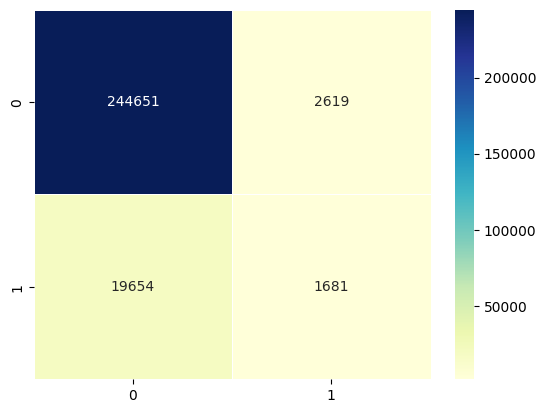

In [69]:
rforest = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
rforest.fit(train, np.ravel(train_labels))
 
y_pred_rforest = rforest.predict(test)

cfm = metrics.confusion_matrix(test_labels, y_pred_rforest)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(test_labels, y_pred_rforest))
print(metrics.classification_report(test_labels, y_pred_rforest))

rforest.get_params()


In [57]:
# knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=5)
# knn.fit(train, np.ravel(train_labels))
 
# y_pred_knn = knn.predict(test)

# cfm = metrics.confusion_matrix(test_labels, y_pred_knn)
# sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
# print('Recall: ',metrics.recall_score(test_labels, y_pred_knn))
# print('Report: ',metrics.classification_report(test_labels, y_pred_knn))
# knn.get_params()



KeyboardInterrupt: 

In [55]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [91]:
# Fit model to training data
xgb = XGBClassifier(tree_method="gpu_hist", enable_categorical=True)
xgb.fit(train, train_labels)

y_pred_xgb = xgb.predict(test)


cfm = metrics.confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(test_labels, y_pred_xgb))
print(metrics.classification_report(test_labels, y_pred_xgb))



XGBoostError: [11:09:51] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000282d26534 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000282e0b760 xgboost::gbm::GBTree::ConfigureUpdaters() + 476
  [bt] (2) 3   libxgboost.dylib                    0x0000000282e068c0 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 952
  [bt] (3) 4   libxgboost.dylib                    0x0000000282e266f8 xgboost::LearnerConfiguration::Configure() + 1124
  [bt] (4) 5   libxgboost.dylib                    0x0000000282e26a10 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x0000000282d3fb1c XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x000000019ccce050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x000000019ccd6af4 ffi_call_int + 1208
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x0000000105827b60 _ctypes_callproc + 1392



In [ ]:
y_pred_xgb = xgb.predict(train)


cfm = metrics.confusion_matrix(train_labels, y_pred_xgb)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(train_labels, y_pred_xgb))
print(metrics.classification_report(train_labels, y_pred_xgb))



In [74]:
# X = data_ros.drop(['target'],axis=1)
# y = data_ros.target
# train, test, train_labels, test_labels = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)



In [79]:
%store -r X_train_scaled_ros
%store -r y_train_ros
%store -r X_test
%store -r y_test

In [85]:
X_train_scaled_ros.shape
y_train_ros.shape
X_test.shape
y_test.head()

567191     0.0
2116738    0.0
1541518    1.0
4290568    0.0
505730     1.0
Name: target, dtype: float64

Recall:  0.5180689008671198
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82    247270
         1.0       0.14      0.52      0.22     21335

    accuracy                           0.71    268605
   macro avg       0.54      0.62      0.52    268605
weighted avg       0.88      0.71      0.77    268605



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

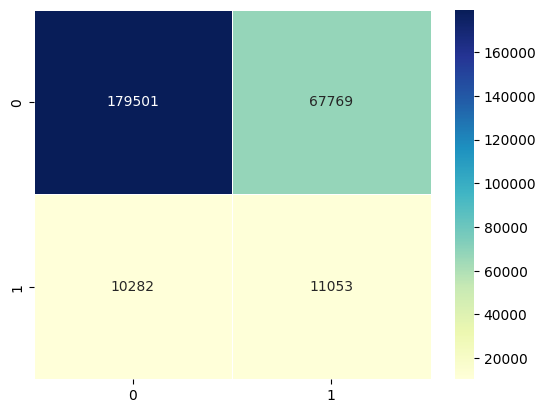

In [90]:
rforest = RandomForestClassifier(n_jobs=-1, max_depth=15)
rforest.fit(X_train_scaled_ros, np.ravel(y_train_ros))
 
y_pred_rforest = rforest.predict(X_test)

cfm = metrics.confusion_matrix(y_test, y_pred_rforest)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_test, y_pred_rforest))
print(metrics.classification_report(y_test, y_pred_rforest))

rforest.get_params()

Recall:  0.9824893147209002
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    576962
         1.0       0.99      0.98      0.98    576962

    accuracy                           0.98   1153924
   macro avg       0.98      0.98      0.98   1153924
weighted avg       0.98      0.98      0.98   1153924



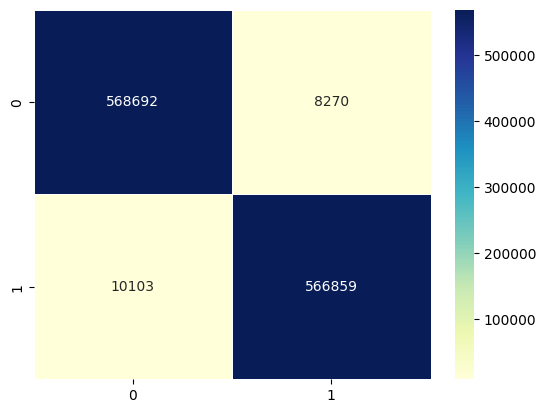

In [86]:
y_pred_rforest = rforest.predict(X_train_scaled_ros)

cfm = metrics.confusion_matrix(y_train_ros, y_pred_rforest)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_train_ros, y_pred_rforest))
print(metrics.classification_report(y_train_ros, y_pred_rforest))